In [36]:
import time
import numpy as np
import pandas as pd
# import seaborn as sns
import string
import re
# sns.set()

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

In [37]:
# C:/Users/marko/OneDrive/바탕 화면/semeval/Task 6 - windows/eda_nlp-20240601T173748Z-001/thesis_data_after
# task PG, num_aug 16

# just use sr, and rs 6/6
pg_rd_path = 'C:/Users/marko/OneDrive/바탕 화면/semeval/Task 6 - windows/eda_nlp-20240601T173748Z-001/eda_nlp/thesis_data_after/rd/pg_df_rd.csv'
pg_ri_path = 'C:/Users/marko/OneDrive/바탕 화면/semeval/Task 6 - windows/eda_nlp-20240601T173748Z-001/eda_nlp/thesis_data_after/ri/pg_df_ri.csv'
pg_rs_path = 'C:/Users/marko/OneDrive/바탕 화면/semeval/Task 6 - windows/eda_nlp-20240601T173748Z-001/eda_nlp/thesis_data_lemmatized_after/rs/pg_df_rs.csv'
pg_sr_path = 'C:/Users/marko/OneDrive/바탕 화면/semeval/Task 6 - windows/eda_nlp-20240601T173748Z-001/eda_nlp/thesis_data_lemmatized_after/sr/pg_df_sr.csv'

pg_rd = pd.read_csv(pg_rd_path, encoding_errors='backslashreplace')
pg_ri = pd.read_csv(pg_ri_path, encoding_errors='backslashreplace')
pg_rs = pd.read_csv(pg_rs_path, encoding_errors='backslashreplace')
pg_sr = pd.read_csv(pg_sr_path, encoding_errors='backslashreplace')

# num_aug 160
path1 = 'C:/Users/marko/OneDrive/바탕 화면/semeval/Task 6 - windows/eda_nlp-20240601T173748Z-001/eda_nlp/thesis_data_after/rd/pg_df_rd.csv'
path2 = 'C:/Users/marko/OneDrive/바탕 화면/semeval/Task 6 - windows/eda_nlp-20240601T173748Z-001/eda_nlp/thesis_data_after/ri/pg_df_ri.csv'
path3 = 'C:/Users/marko/OneDrive/바탕 화면/semeval/Task 6 - windows/eda_nlp-20240601T173748Z-001/eda_nlp/thesis_data_lemmatized_after_160/rs/pg_df_rs.csv'
path4 = 'C:/Users/marko/OneDrive/바탕 화면/semeval/Task 6 - windows/eda_nlp-20240601T173748Z-001/eda_nlp/thesis_data_lemmatized_after_160/sr/pg_df_sr.csv'

pg_rd_160 = pd.read_csv(path1, encoding_errors='backslashreplace')
pg_ri_160 = pd.read_csv(path2, encoding_errors='backslashreplace')
pg_rs_160 = pd.read_csv(path3, encoding_errors='backslashreplace')
pg_sr_160 = pd.read_csv(path4, encoding_errors='backslashreplace')

In [38]:
# task DM 16
path1 = 'C:/Users/marko/OneDrive/바탕 화면/semeval/Task 6 - windows/eda_nlp-20240601T173748Z-001/eda_nlp/thesis_data_after/rd/dm_df_rd.csv'
path2 = 'C:/Users/marko/OneDrive/바탕 화면/semeval/Task 6 - windows/eda_nlp-20240601T173748Z-001/eda_nlp/thesis_data_after/ri/dm_df_ri.csv'
path3 = 'C:/Users/marko/OneDrive/바탕 화면/semeval/Task 6 - windows/eda_nlp-20240601T173748Z-001/eda_nlp/thesis_data_lemmatized_after/rs/dm_df_rs.csv'
path4 = 'C:/Users/marko/OneDrive/바탕 화면/semeval/Task 6 - windows/eda_nlp-20240601T173748Z-001/eda_nlp/thesis_data_lemmatized_after/sr/dm_df_sr.csv'

dm_rd = pd.read_csv(path1, encoding_errors='backslashreplace')
dm_ri = pd.read_csv(path2, encoding_errors='backslashreplace')
dm_rs = pd.read_csv(path3, encoding_errors='backslashreplace')
dm_sr = pd.read_csv(path4, encoding_errors='backslashreplace')

# 160
path1 = 'C:/Users/marko/OneDrive/바탕 화면/semeval/Task 6 - windows/eda_nlp-20240601T173748Z-001/eda_nlp/thesis_data_after_160/rd/dm_df_rd.csv'
path2 = 'C:/Users/marko/OneDrive/바탕 화면/semeval/Task 6 - windows/eda_nlp-20240601T173748Z-001/eda_nlp/thesis_data_after_160/ri/dm_df_ri.csv'
path3 = 'C:/Users/marko/OneDrive/바탕 화면/semeval/Task 6 - windows/eda_nlp-20240601T173748Z-001/eda_nlp/thesis_data_lemmatized_after_160/rs/dm_df_rs.csv'
path4 = 'C:/Users/marko/OneDrive/바탕 화면/semeval/Task 6 - windows/eda_nlp-20240601T173748Z-001/eda_nlp/thesis_data_lemmatized_after_160/sr/dm_df_sr.csv'

dm_rd_160 = pd.read_csv(path1, encoding_errors='backslashreplace')
dm_ri_160 = pd.read_csv(path2, encoding_errors='backslashreplace')
dm_rs_160 = pd.read_csv(path3, encoding_errors='backslashreplace')
dm_sr_160 = pd.read_csv(path4, encoding_errors='backslashreplace')

In [39]:
# task MT 16
path1 = 'C:/Users/marko/OneDrive/바탕 화면/semeval/Task 6 - windows/eda_nlp-20240601T173748Z-001/eda_nlp/thesis_data_after/rd/mt_df_rd.csv'
path2 = 'C:/Users/marko/OneDrive/바탕 화면/semeval/Task 6 - windows/eda_nlp-20240601T173748Z-001/eda_nlp/thesis_data_after/ri/mt_df_ri.csv'
path3 = 'C:/Users/marko/OneDrive/바탕 화면/semeval/Task 6 - windows/eda_nlp-20240601T173748Z-001/eda_nlp/thesis_data_lemmatized_after/rs/mt_df_rs.csv'
path4 = 'C:/Users/marko/OneDrive/바탕 화면/semeval/Task 6 - windows/eda_nlp-20240601T173748Z-001/eda_nlp/thesis_data_lemmatized_after/sr/mt_df_sr.csv'

mt_rd = pd.read_csv(path1, encoding_errors='backslashreplace')
mt_ri = pd.read_csv(path2, encoding_errors='backslashreplace')
mt_rs = pd.read_csv(path3, encoding_errors='backslashreplace')
mt_sr = pd.read_csv(path4, encoding_errors='backslashreplace')

# 160
path1 = 'C:/Users/marko/OneDrive/바탕 화면/semeval/Task 6 - windows/eda_nlp-20240601T173748Z-001/eda_nlp/thesis_data_after_160/rd/mt_df_rd.csv'
path2 = 'C:/Users/marko/OneDrive/바탕 화면/semeval/Task 6 - windows/eda_nlp-20240601T173748Z-001/eda_nlp/thesis_data_after_160/ri/mt_df_ri.csv'
path3 = 'C:/Users/marko/OneDrive/바탕 화면/semeval/Task 6 - windows/eda_nlp-20240601T173748Z-001/eda_nlp/thesis_data_lemmatized_after_160/rs/mt_df_rs.csv'
path4 = 'C:/Users/marko/OneDrive/바탕 화면/semeval/Task 6 - windows/eda_nlp-20240601T173748Z-001/eda_nlp/thesis_data_lemmatized_after_160/sr/mt_df_sr.csv'

mt_rd_160 = pd.read_csv(path1, encoding_errors='backslashreplace')
mt_ri_160 = pd.read_csv(path2, encoding_errors='backslashreplace')
mt_rs_160 = pd.read_csv(path3, encoding_errors='backslashreplace')
mt_sr_160 = pd.read_csv(path4, encoding_errors='backslashreplace')

In [40]:
# pg_rd = pg_rd.dropna(how="any", axis=1)
pg_rd = pg_rd.fillna('')
pg_ri = pg_ri.fillna('')
pg_rs = pg_rs.fillna('')
pg_sr = pg_sr.fillna('')

dm_rd = dm_rd.fillna('')
dm_ri = dm_ri.fillna('')
dm_rs = dm_rs.fillna('')
dm_sr = dm_sr.fillna('')

mt_rd = mt_rd.fillna('')
mt_ri = mt_ri.fillna('')
mt_rs = mt_rs.fillna('')
mt_sr = mt_sr.fillna('')

pg_rd_160 = pg_rd_160.fillna('')
pg_ri_160 = pg_ri_160.fillna('')
pg_rs_160 = pg_rs_160.fillna('')
pg_sr_160 = pg_sr_160.fillna('')

dm_rd_160 = dm_rd_160.fillna('')
dm_ri_160 = dm_ri_160.fillna('')
dm_rs_160 = dm_rs_160.fillna('')
dm_sr_160 = dm_sr_160.fillna('')

mt_rd_160 = mt_rd_160.fillna('')
mt_ri_160 = mt_ri_160.fillna('')
mt_rs_160 = mt_rs_160.fillna('')
mt_sr_160 = mt_sr_160.fillna('')
# drop na just deleted the model column i think
mt_rd_160

,hyp,ref,src,tgt,model,label,p(Hallucination),Unnamed: 7
0,john john one,either,,john ann like,,1,1.0,
1,john john one,either,,john ann like,,1,1.0,
2,john john one,either,,john ann like,,1,1.0,
3,john one,either,,john ann,,1,1.0,
4,john john one,either,,john ann like,,1,1.0,
...,...,...,...,...,...,...,...,...
7849,dont money buy dictionary,either,,money buy dictionary,,0,0.0,
7850,dont money buy dictionary,either,,buy dictionary,,0,0.0,
7851,dont money buy dictionary,either,,money buy dictionary,,0,0.0,
7852,dont money buy dictionary,either,,money buy dictionary,,0,0.0,


In [41]:
# remove any label columns with some other value than 0 or 1
# df_filtered = df[df['labels'].isin([0, 1])]
# pg_rd = pg_rd[pg_rd['label']].isin([0, 1])
# pg_ri = pg_ri[pg_ri['label']].isin([0, 1])

# dm_rd = dm_rd.isin([0, 1])
# dm_ri = dm_ri.isin([0, 1])
# dm_rs = dm_rs.isin([0, 1])
# dm_sr = dm_sr.isin([0, 1])

# mt_rd = mt_rd.isin([0, 1])
# mt_ri = mt_ri.isin([0, 1])
# mt_rs = mt_rs.isin([0, 1])
# mt_sr = mt_sr.isin([0, 1])

In [42]:
dm_sr_160['label'].value_counts()

label
0    4158
1    3738
Name: count, dtype: int64

In [43]:
# data aug only sr, scores with 0.0 or 1.0
dm_sr_160_highscore = dm_sr_160[dm_sr_160['p(Hallucination)'].isin([0.0, 1.0])]
pg_sr_160_highscore = pg_sr_160[pg_sr_160['p(Hallucination)'].isin([0.0, 1.0])]
mt_sr_160_highscore = mt_sr_160[mt_sr_160['p(Hallucination)'].isin([0.0, 1.0])]

In [44]:
import pandas as pd
from sklearn.utils import resample

# Assuming df is your DataFrame
# Separate majority and minority classes
# change here the dataset_name
# before_balance_dataset = dm_sr_160_highscore
# before_balance_dataset = pg_sr_160_highscore
before_balance_dataset = mt_sr_160_highscore

df_majority = before_balance_dataset[before_balance_dataset.label == 0]
df_minority = before_balance_dataset[before_balance_dataset.label == 1]

# Check the counts
print("Majority class count:", len(df_majority))
print("Minority class count:", len(df_minority))

# Downsample majority class if there are enough samples
if len(df_majority) >= 200 and len(df_minority) >= 200:
    df_majority_downsampled = resample(df_majority, 
                                       replace=False,    # sample without replacement
                                       n_samples=200,   # to match minority class
                                       random_state=42)  # reproducible results
    df_minority_downsampled = resample(df_minority, 
                                        replace=False,    # sample without replacement
                                        n_samples=200,   # to match minority class
                                        random_state=42)

    # Combine minority class with downsampled majority class
    df_balanced = pd.concat([df_majority_downsampled, df_minority_downsampled])
else:
    raise ValueError("Not enough samples in one of the classes to downsample to 200")

# Shuffle the resulting DataFrame
balanced_dataset = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print(balanced_dataset['label'].value_counts())


Majority class count: 1806
Minority class count: 210
label
1    200
0    200
Name: count, dtype: int64


In [45]:
# original dataset before data aug
# X, y = pg_df['hyp'], pg_df['label']
# X, y = dm_df['hyp'], dm_df['label']
# X, y = mt_df['hyp'], mt_df['label']

# task PG
# X, y = pg_rd[['hyp','tgt']] , pg_rd['label']
# X, y = pg_ri[['hyp','tgt']] , pg_ri['label']
# X, y = pg_rs[['hyp','tgt']] , pg_rs['label']
# X, y = pg_sr[['hyp','tgt']] , pg_sr['label']
# task DM
# X, y = dm_rd[['hyp','tgt']] , dm_rd['label']
# X, y = dm_ri[['hyp','tgt']], dm_ri['label']
# X, y = dm_rs[['hyp','tgt']] , dm_rs['label']
# X, y = dm_sr[['hyp','tgt']] , dm_sr['label']
# task MT
# X, y = mt_rd[['hyp','tgt']] , mt_rd['label']
# X, y = mt_ri[['hyp','tgt']] , mt_ri['label']
# X, y = mt_rs[['hyp','tgt']] , mt_rs['label']
# X, y = mt_sr[['hyp','tgt']] , mt_sr['label']

# X, y = df['hyp'], df['label']
# one way of getting label where task is DM, df.loc[df['task'] == 'DM', 'label']
# X, y = df[df['task'] == 'PG']['hyp'], df[df['task'] == 'PG']['label']

# task PG
# X, y = pg_rd_160[['hyp','tgt']] , pg_rd_160['label']
# X, y = pg_ri_160[['hyp','tgt']] , pg_ri_160['label']
# X, y = pg_rs_160[['hyp','tgt']] , pg_rs_160['label']
# X, y = pg_sr_160[['hyp','tgt']] , pg_sr_160['label']
# X, y = pg_sr_160_balanced[['hyp','tgt']] , pg_sr_160_balanced['label']
# pg_sr_160 for some reason does not have any tgt values in all rows??

# task DM
# X, y = dm_rd_160[['hyp','tgt']] , dm_rd_160['label']
# X, y = dm_ri_160[['hyp','tgt']] , dm_ri_160['label']
# X, y = dm_rs_160[['hyp','tgt']] , dm_rs_160['label']
# X, y = dm_sr_160[['hyp','tgt']] , dm_sr_160['label']
# X, y = dm_sr_160_balanced[['hyp','tgt']] , dm_sr_160_balanced['label']
X, y = balanced_dataset[['hyp','tgt']] , balanced_dataset['label']
# dm_sr_160 had basically the same amount of entrie of class 0 and 1
# Counter({0: 4158, 1: 3738}), so i skipped making balanced dataset
# task MT
# X, y = mt_rd_160[['hyp','tgt']] , mt_rd_160['label']
# X, y = mt_ri_160[['hyp','tgt']] , mt_ri_160['label']
# X, y = mt_rs_160[['hyp','tgt']] , mt_rs_160['label']
# X, y = mt_sr_160[['hyp','tgt']] , mt_sr_160['label']

In [46]:
import collections
# y.value_counts()
counter = collections.Counter(y)
counter
# just as reference, pg_rd from thesis_data_after directory has 750 entry in total
# 480 is 0 and 270 is 1
# but pg_rs after lemmatizing and using 160 data aug,
# total: about 5200, 0 is 4158 and 1is 1092

Counter({1: 200, 0: 200})

In [47]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()
# stemmer = nltk.SnowballStemmer("english")



def clean_text(text):
    '''
    Make text lowercase, remove text in square brackets, remove links, remove punctuation,
    and remove words containing numbers.
    '''
    text = str(text).lower()
    
    # Remove text in square brackets
    text = re.sub(r'\[.*?\]', '', text)
    
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # Remove punctuation
    text = re.sub(rf'[{re.escape(string.punctuation)}]', ' ', text)
    
    # Remove new lines
    text = re.sub(r'\n', ' ', text)
    
    # Remove words containing numbers
    text = re.sub(r'\w*\d\w*', '', text)
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

def preprocess_data(text):
    text = clean_text(text)  # Clean punctuation, URLs, and so on
    
    # Remove stopwords
    text = ' '.join(word for word in text.split() if word not in stop_words)
    
    # Lemmatize all the words in the sentence
    text = ' '.join(lemmatizer.lemmatize(word) for word in text.split())
    
    return text

# Example usage
example_text = "This is an example text with a URL: http://example.com and an email: example@example.com."
cleaned_text = preprocess_data(example_text)
print(cleaned_text)


example text url email example example com


In [48]:
example_preprocessed = preprocess_data("side casket cover heavi black broadcloth velvet cap present deeply contrast rich surmount mean surmount,interior decoration featur sit top someth")
example_preprocessed

'side casket cover heavi black broadcloth velvet cap present deeply contrast rich surmount mean surmount interior decoration featur sit top someth'

In [49]:
print("Class distribution:\n", y.value_counts())

Class distribution:
 label
1    200
0    200
Name: count, dtype: int64


In [50]:
X = np.array(X)

y = np.array(y)


In [51]:
for i in range(len(X)):
    X[i] = str(X[i])

In [52]:
# split into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  random_state=42)
len(X_train), len(y_train), len(X_test), len(y_test)

(320, 320, 80, 80)

In [53]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

In [54]:
# paths to final test data
final_ag_path = 'C:/Users/marko/OneDrive/바탕 화면/semeval/Task 6 - windows/final_test_data/test.model-agnostic.json'
final_aw_path = 'C:/Users/marko/OneDrive/바탕 화면/semeval/Task 6 - windows/final_test_data/test.model-agnostic.json'

final_ag_df = pd.read_json(final_ag_path, encoding_errors='backslashreplace')
final_aw_df = pd.read_json(final_aw_path, encoding_errors='backslashreplace')
final_ag_df["label"] = final_ag_df["label"].map({"Hallucination":1, "Not Hallucination":0})
final_aw_df["label"] = final_aw_df["label"].map({"Hallucination":1, "Not Hallucination":0})
# perform preprocessing on final_df AND split it based on tasks!
columns = ['hyp','src','tgt'] # exclude task
for x in columns:
    final_ag_df[x] = final_ag_df[x].apply(preprocess_data)
for x in columns:
    final_aw_df[x] = final_aw_df[x].apply(preprocess_data)
final_ag_pg = final_ag_df[final_ag_df['task'] == 'PG']
final_ag_dm = final_ag_df[final_ag_df['task'] == 'DM']
final_ag_mt = final_ag_df[final_ag_df['task'] == 'MT']

final_aw_pg = final_aw_df[final_aw_df['task'] == 'PG']
final_aw_dm = final_aw_df[final_aw_df['task'] == 'DM']
final_aw_mt = final_aw_df[final_aw_df['task'] == 'MT']

final_ag_df

,id,src,tgt,hyp,task,labels,label,p(Hallucination)
0,1,ты удивишься если я скажу что на самом деле ме...,would surprised told name actually tom,gonna surprised say real name tom,MT,"[Not Hallucination, Not Hallucination, Not Hal...",0,0.0
1,2,еды будет полно,plenty food,food full,MT,"[Hallucination, Not Hallucination, Hallucinati...",1,0.8
2,3,думаете том будет меня ждать,think tom wait,think tom gonna wait,MT,"[Not Hallucination, Not Hallucination, Not Hal...",0,0.2
3,6,два брата довольно разные,two brother pretty different,lot friend,MT,"[Hallucination, Hallucination, Hallucination, ...",1,1.0
4,7,infradiaphragmatic intra suprasellar craniopha...,medicine diaphragm,anatomy relating diaphragm,DM,"[Hallucination, Hallucination, Hallucination, ...",1,0.8
...,...,...,...,...,...,...,...,...
1495,2992,я никогда не говорил мэри что чувствую,never told mary felt,never told mary feel,MT,"[Hallucination, Not Hallucination, Not Halluci...",0,0.4
1496,2993,beat rat tailed kyoodle run steer eric laid ha...,mutt dog mixed breed little value noisy dog,slang mustang,DM,"[Hallucination, Hallucination, Hallucination, ...",1,1.0
1497,2994,ты знаешь почему они прекратили говорить,know stopped talking,know stopped talking,MT,"[Hallucination, Not Hallucination, Not Halluci...",0,0.4
1498,2996,anyone back,anyone confirm,anyone corroborate,PG,"[Not Hallucination, Not Hallucination, Not Hal...",0,0.0


In [55]:
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.model_selection import StratifiedKFold
from transformers import TFRobertaForSequenceClassification, AutoTokenizer
import tensorflow as tf
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

# checkpoint = 'FacebookAI/roberta-large'
# another model
# checkpoint = "cardiffnlp/twitter-roberta-base-emotion"
checkpoint = 'FacebookAI/roberta-base'
tokenizer = AutoTokenizer.from_pretrained(checkpoint)


In [56]:
import tf_keras
adam = tf_keras.src.optimizers.Adam(learning_rate=1e-6)

In [57]:
# import tensorflow as tf
# # Ensure eager execution
# tf.config.run_functions_eagerly(True)
# russian = tf.convert_to_tensor("ты знаешь почему они прекратили говорить", dtype=tf.int32)
# russian

In [58]:
# this here uses manual cross validation!
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import datasets
import time
# from kerastuner.tuners import RandomSearch

# tuner = RandomSearch(
#     build_model,
#     objective='val_accuracy',
#     max_trials=5,
#     executions_per_trial=1,
#     directory='my_dir',
#     project_name='hyperparameter_tuning'
# )

BATCH_SIZE = 8
# changed epochs from 5 to 8 at June 6th
EPOCHS = 10
N_SPLITS = 5

# Shuffle and split data into N_SPLITS folds
indices = np.arange(len(X))
np.random.shuffle(indices)
folds = np.array_split(indices, N_SPLITS)

# Initialize lists to store evaluation metrics
all_val_preds = []
accuracies = []
precisions = []
recalls = []
f1s = []

def tokenize_function(example):
    return tokenizer(example['hyp'], text_pair=example['tgt'], truncation=True, padding='max_length', max_length=256)

def order(inp):
    data = list(inp.values())
    return {
        'input_ids': tf.convert_to_tensor(data[1], dtype=tf.int32),
        'attention_mask': tf.convert_to_tensor(data[2], dtype=tf.int32),
    }, data[0]
# changed from optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=1e-5), to without legacy
# bert_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased',num_labels=1)
# bert_model.compile(
#     # optimizer=Adam,
#     loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
#     metrics=['accuracy']
# )

for i in range(N_SPLITS):
    # Reset model for each fold
    roberta_model = TFRobertaForSequenceClassification.from_pretrained(checkpoint, num_labels=1)
    
    # Compile the model with appropriate loss function and optimizer
    roberta_model.compile(
        optimizer=adam,
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
        metrics=['accuracy']
    )
    # the code below resets model, and I might try it out? maybe idk
    # Prepare training and validation indices
    val_indices = folds[i]
    train_indices = np.hstack([folds[j] for j in range(N_SPLITS) if j != i])

    # Split the data
    X_train2, X_val = X[train_indices], X[val_indices]
    y_train2, y_val = y[train_indices], y[val_indices]
    # Create Pandas DataFrames
    X_train2_df = pd.DataFrame({'hyp': X_train2[:,0], 'tgt':X_train2[:,1], 'label': y_train2})
    X_val_df = pd.DataFrame({'hyp': X_val[:,0], 'tgt': X_val[:,1], 'label': y_val})

    # Convert to HuggingFace Datasets
    df_train = datasets.Dataset.from_pandas(X_train2_df)
    df_val = datasets.Dataset.from_pandas(X_val_df)
    dataset = datasets.DatasetDict({'train': df_train, 'val': df_val})

    # Tokenize the datasets
    tokenized_datasets_mapped = dataset.map(tokenize_function, batched=True, batch_size=BATCH_SIZE, remove_columns=['hyp','tgt'])
    # Convert to TensorFlow Datasets
    train_dataset = tf.data.Dataset.from_tensor_slices(tokenized_datasets_mapped['train'][:])
    train_dataset = train_dataset.batch(BATCH_SIZE).shuffle(1000)
    train_dataset = train_dataset.map(order, num_parallel_calls=tf.data.AUTOTUNE)

    val_dataset = tf.data.Dataset.from_tensor_slices(tokenized_datasets_mapped['val'][:])
    val_dataset = val_dataset.batch(BATCH_SIZE)
    val_dataset = val_dataset.map(order, num_parallel_calls=tf.data.AUTOTUNE)

    # Train the model
    start = time.time()
    roberta_model.fit(train_dataset, validation_data=val_dataset, epochs=EPOCHS)
    end = time.time()
    elapsed_time = round(end - start, 2)
    print(f'Fitting fold {i+1} is DONE!! Time: {elapsed_time}s')

    # Evaluate the model
    evaluated = roberta_model.evaluate(val_dataset)
    val_preds = roberta_model.predict(val_dataset).logits
#     val_preds = tf.nn.softmax(val_preds, axis=1).numpy()[:, 1]  # Probability of class 1, 1 try
    # val_preds = tf.nn.sigmoid(val_preds).numpy().squeeze()[:, 1] # 2nd attempt, also i might need try out
    # using a [:, 0] instead?
    # Apply sigmoid activation
    val_preds = tf.nn.sigmoid(val_preds).numpy()

    # Check if val_preds has more than one dimension
    if val_preds.ndim > 1:
        val_preds = val_preds.squeeze()
        # Ensure that there are at least two dimensions to index
        if val_preds.ndim > 1:
            val_preds = val_preds[:, 1]
        else:
            # Handle case where squeezing resulted in a single dimension
            val_preds = val_preds.flatten()
    else:
        val_preds = val_preds.flatten()
    precision, recall, f1, _ = precision_recall_fscore_support(y_val, val_preds.round(), average='weighted')
    acc = accuracy_score(y_val, val_preds.round())

    all_val_preds.append(val_preds)
    accuracies.append(acc)
    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)

# Calculate and print average metrics
print(f'Mean Accuracy: {np.mean(accuracies)}')
print(f'Mean Precision: {np.mean(precisions)}')
print(f'Mean Recall: {np.mean(recalls)}')
print(f'Mean F1 Score: {np.mean(f1s)}')


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaForSequenceClassification: ['roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predicti

Epoch 1/10
40/40 [==============================] - 242s 6s/step - loss: 0.6949 - accuracy: 0.4906 - val_loss: 0.6995 - val_accuracy: 0.5375
Epoch 2/10
40/40 [==============================] - 240s 6s/step - loss: 0.6921 - accuracy: 0.4906 - val_loss: 0.6979 - val_accuracy: 0.5375
Epoch 3/10
40/40 [==============================] - 229s 6s/step - loss: 0.6918 - accuracy: 0.4906 - val_loss: 0.6957 - val_accuracy: 0.5375
Epoch 4/10
40/40 [==============================] - 224s 6s/step - loss: 0.6868 - accuracy: 0.4906 - val_loss: 0.6913 - val_accuracy: 0.5375
Epoch 5/10
40/40 [==============================] - 223s 6s/step - loss: 0.6866 - accuracy: 0.4906 - val_loss: 0.6820 - val_accuracy: 0.5375
Epoch 6/10
40/40 [==============================] - 224s 6s/step - loss: 0.6644 - accuracy: 0.4906 - val_loss: 0.6395 - val_accuracy: 0.5375
Epoch 7/10
40/40 [==============================] - 255s 6s/step - loss: 0.5690 - accuracy: 0.6750 - val_loss: 0.4325 - val_accuracy: 0.9000
Epoch 8/10
40

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaForSequenceClassification: ['roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predicti

Epoch 1/10
40/40 [==============================] - 235s 6s/step - loss: 0.6924 - accuracy: 0.4969 - val_loss: 0.6908 - val_accuracy: 0.5125
Epoch 2/10
40/40 [==============================] - 233s 6s/step - loss: 0.6899 - accuracy: 0.4969 - val_loss: 0.6828 - val_accuracy: 0.5125
Epoch 3/10
40/40 [==============================] - 234s 6s/step - loss: 0.6689 - accuracy: 0.5000 - val_loss: 0.6254 - val_accuracy: 0.5125
Epoch 4/10
40/40 [==============================] - 235s 6s/step - loss: 0.5129 - accuracy: 0.7594 - val_loss: 0.3053 - val_accuracy: 0.9750
Epoch 5/10
40/40 [==============================] - 233s 6s/step - loss: 0.2218 - accuracy: 0.9844 - val_loss: 0.1007 - val_accuracy: 0.9875
Epoch 6/10
40/40 [==============================] - 233s 6s/step - loss: 0.1058 - accuracy: 0.9906 - val_loss: 0.0494 - val_accuracy: 1.0000
Epoch 7/10
40/40 [==============================] - 234s 6s/step - loss: 0.0589 - accuracy: 1.0000 - val_loss: 0.0348 - val_accuracy: 1.0000
Epoch 8/10
40

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaForSequenceClassification: ['roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predicti

Epoch 1/10
40/40 [==============================] - 236s 6s/step - loss: 0.6974 - accuracy: 0.5063 - val_loss: 0.6905 - val_accuracy: 0.4750
Epoch 2/10
40/40 [==============================] - 234s 6s/step - loss: 0.6869 - accuracy: 0.5063 - val_loss: 0.6747 - val_accuracy: 0.4750
Epoch 3/10
40/40 [==============================] - 234s 6s/step - loss: 0.6185 - accuracy: 0.5875 - val_loss: 0.4504 - val_accuracy: 0.8000
Epoch 4/10
40/40 [==============================] - 235s 6s/step - loss: 0.2970 - accuracy: 0.9125 - val_loss: 0.1165 - val_accuracy: 1.0000
Epoch 5/10
40/40 [==============================] - 237s 6s/step - loss: 0.1090 - accuracy: 0.9969 - val_loss: 0.0511 - val_accuracy: 1.0000
Epoch 6/10
40/40 [==============================] - 233s 6s/step - loss: 0.0569 - accuracy: 1.0000 - val_loss: 0.0323 - val_accuracy: 1.0000
Epoch 7/10
40/40 [==============================] - 234s 6s/step - loss: 0.0392 - accuracy: 1.0000 - val_loss: 0.0234 - val_accuracy: 1.0000
Epoch 8/10
40

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaForSequenceClassification: ['roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predicti

Epoch 1/10
40/40 [==============================] - 238s 6s/step - loss: 0.6923 - accuracy: 0.5063 - val_loss: 0.6917 - val_accuracy: 0.4750
Epoch 2/10
40/40 [==============================] - 235s 6s/step - loss: 0.6740 - accuracy: 0.5063 - val_loss: 0.6359 - val_accuracy: 0.4750
Epoch 3/10
40/40 [==============================] - 236s 6s/step - loss: 0.5148 - accuracy: 0.7656 - val_loss: 0.3074 - val_accuracy: 0.9500
Epoch 4/10
40/40 [==============================] - 236s 6s/step - loss: 0.1928 - accuracy: 0.9937 - val_loss: 0.0693 - val_accuracy: 1.0000
Epoch 5/10
40/40 [==============================] - 234s 6s/step - loss: 0.0814 - accuracy: 0.9937 - val_loss: 0.0359 - val_accuracy: 1.0000
Epoch 6/10
40/40 [==============================] - 235s 6s/step - loss: 0.0455 - accuracy: 1.0000 - val_loss: 0.0241 - val_accuracy: 1.0000
Epoch 7/10
40/40 [==============================] - 235s 6s/step - loss: 0.0316 - accuracy: 1.0000 - val_loss: 0.0185 - val_accuracy: 1.0000
Epoch 8/10
40

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaForSequenceClassification: ['roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predicti

Epoch 1/10
40/40 [==============================] - 237s 6s/step - loss: 0.6928 - accuracy: 0.5063 - val_loss: 0.6848 - val_accuracy: 0.5000
Epoch 2/10
40/40 [==============================] - 235s 6s/step - loss: 0.6704 - accuracy: 0.5063 - val_loss: 0.6224 - val_accuracy: 0.5750
Epoch 3/10
40/40 [==============================] - 235s 6s/step - loss: 0.5148 - accuracy: 0.7281 - val_loss: 0.3171 - val_accuracy: 0.9750
Epoch 4/10
40/40 [==============================] - 236s 6s/step - loss: 0.2338 - accuracy: 0.9625 - val_loss: 0.0957 - val_accuracy: 1.0000
Epoch 5/10
40/40 [==============================] - 236s 6s/step - loss: 0.0923 - accuracy: 0.9969 - val_loss: 0.0493 - val_accuracy: 1.0000
Epoch 6/10
40/40 [==============================] - 235s 6s/step - loss: 0.0582 - accuracy: 1.0000 - val_loss: 0.0686 - val_accuracy: 0.9750
Epoch 7/10
40/40 [==============================] - 235s 6s/step - loss: 0.0383 - accuracy: 1.0000 - val_loss: 0.0263 - val_accuracy: 1.0000
Epoch 8/10
40

In [78]:
# Convert to TensorFlow Datasets
def order_final(example):
    return {
        'input_ids': tf.convert_to_tensor(example['input_ids'], dtype=tf.int32),
        'attention_mask': tf.convert_to_tensor(example['attention_mask'], dtype=tf.int32),
    }, tf.convert_to_tensor(example['label'], dtype=tf.int32)


# final two datasets
ag_X, ag_y = final_ag_pg[['hyp','tgt']], final_ag_pg['label']
# ag_X, ag_y = final_ag_dm[['hyp','tgt']], final_ag_dm['label']
# ag_X, ag_y = final_ag_mt[['hyp','tgt']], final_ag_mt['label']

# ag_X, ag_y = final_aw_pg['hyp'], final_aw_pg['label']
# ag_X, ag_y = final_aw_dm['hyp'], final_aw_dm['label']
# ag_X, ag_y = final_aw_mt['hyp'], final_aw_mt['label']

In [79]:
print(ag_y.value_counts())
# in final_pg dataset, 0=278, 1=97
# in final_dm dataset, 0=288, 1=275
# in final_mt dataset, 0=336, 1=226

label
0    336
1    226
Name: count, dtype: int64


In [80]:
# i guess right now the big question is, is there a point in using cross validation?
# unless to get best hyper paramter, which i believe i can use some other library for that,
# what is the point? chatgpt said training final model invovles just using only
# train test split so...

print(f'Accuracy: {np.mean(accuracies):.4f}')
print(f'Precision: {np.mean(precisions):.4f}')
print(f'Recall: {np.mean(recalls):.4f}')
print(f'F1 Score: {np.mean(f1s):.4f}')

Accuracy: 0.9975
Precision: 0.9976
Recall: 0.9975
F1 Score: 0.9975


In [81]:
import numpy as np
import pandas as pd
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.metrics import accuracy_score
import datasets

# Ensure eager execution
tf.config.run_functions_eagerly(True)

BATCH_SIZE = 8
# Create Pandas DataFrame without the index
final_df = pd.DataFrame({'hyp': ag_X['hyp'], 'tgt': ag_X['tgt'], 'label': ag_y})
columns = ['hyp','tgt']
for x in columns:
    final_df[x] = final_df[x].apply(preprocess_data)

# Convert to HuggingFace Datasets
final_df2 = datasets.Dataset.from_pandas(final_df)
dataset = datasets.DatasetDict({'final': final_df2})



tokenized_datasets_mapped = dataset.map(tokenize_function, batched=True, batch_size=BATCH_SIZE, remove_columns=['hyp','tgt'])

# Use from_generator to create dataset with correct output signature
# final_dataset = tf.data.Dataset.from_generator(
#     lambda: iter(tokenized_datasets_mapped['final']),
#     output_signature=(
#         {
#             'input_ids': tf.TensorSpec(shape=(None,), dtype=tf.int32),
#             'attention_mask': tf.TensorSpec(shape=(None,), dtype=tf.int32),
#             'token_type_ids': tf.TensorSpec(shape=(None,), dtype=tf.int32)
#         },
#         tf.TensorSpec(shape=(), dtype=tf.int32)
#     )
# )
final_dataset = tf.data.Dataset.from_tensor_slices(tokenized_datasets_mapped['final'][:])
final_dataset = final_dataset.batch(BATCH_SIZE)
final_dataset = final_dataset.map(order_final, num_parallel_calls=tf.data.AUTOTUNE)

# Evaluate the model
final_preds = roberta_model.predict(final_dataset).logits

# Apply sigmoid to get probabilities and flatten the tensor
final_preds = tf.nn.sigmoid(final_preds).numpy().squeeze()

# If final_preds is still multidimensional, reduce it to a 1D array
if final_preds.ndim > 1:
    final_preds = final_preds[:, 0]
final_preds_binary = final_preds.round()
# Calculate and print accuracy
accuracy = accuracy_score(ag_y, final_preds_binary)
print(f'Final aggregate accuracy RoBERTA: {accuracy}')
print("Best Accuracy:", accuracy_score(ag_y, final_preds_binary))
print("Best Confusion Matrix:\n", confusion_matrix(ag_y, final_preds_binary))
# Roberta, train = pg_sr, val = final_ag_pg: 0.731
# train = pg_sr, val = final_ag_dm: 0.485
# train = pg_sr, val = final_ag_mt: 0.591

# train = dm_sr, val = final_ag_pg: 0.741
# train = dm_sr, val = final_ag_dm: 0.504
# train = dm_sr, val = final_ag_mt: 0.585

# train = mt_sr, val = final_ag_pg: 0.741
# train = mt_sr, val = final_ag_dm: 0.499
# train = mt_sr, val = final_ag_mt: 0.594

# 50x data!, but it takes way too long so for now i just sampled 500 for each
# class, out of 8000 almost i picked 1000, also i used dm task first
# train = dm_sr, val = final_ag_pg: 0.691 -> 0.691, 0.733? (led to different result randomly one time)
# train = dm_sr, val = final_ag_dm: 0.488 -> 0.488
# train = dm_sr, val = final_ag_mt: 0.557 -> 0.577

# roberta but data with scores of 0.0 and 1.0 is used for training! also each class only has 200 entries
# cuz my computer is keep running out of resources...and crashes
# train dm_sr, val = final_ag_pg: 0.577
# train dm_sr, val = final_ag_dm: 0.531
# train dm_sr, val = final_ag_mt: 0.562

# train pg_sr, val = final_ag_pg: 0.579
# train pg_sr, val = final_ag_dm: 0.528
# train pg_sr, val = final_ag_mt: 0.601

# train mt_sr, val = final_ag_pg: 0.
# train mt_sr, val = final_ag_dm: 0.
# train mt_sr, val = final_ag_mt: 0.



Map: 100%|██████████| 562/562 [00:00<00:00, 5437.79 examples/s]


71/71 [==============================] - 117s 2s/step
Final aggregate accuracy RoBERTA: 0.6014234875444839
Best Accuracy: 0.6014234875444839
Best Confusion Matrix:
 [[236 100]
 [124 102]]


In [63]:
from collections import Counter
counter = Counter(final_preds.round())
counter

Counter({0.0: 242, 1.0: 133})

In [64]:
final_preds

array([0.1265993 , 0.3217269 , 0.14370774, 0.7125236 , 0.544744  ,
       0.21468355, 0.8369412 , 0.4655314 , 0.9267111 , 0.9412722 ,
       0.65032274, 0.19869336, 0.2762728 , 0.37166795, 0.09767828,
       0.35180694, 0.34877616, 0.18808398, 0.07138891, 0.5979515 ,
       0.38743937, 0.09150541, 0.3747508 , 0.97179145, 0.13392113,
       0.07289144, 0.45505586, 0.3772475 , 0.69632006, 0.21671197,
       0.33579743, 0.12096573, 0.3706474 , 0.48057908, 0.7535361 ,
       0.2946664 , 0.61853784, 0.17248578, 0.45085758, 0.05713257,
       0.8371889 , 0.0600821 , 0.7213948 , 0.57379454, 0.9058143 ,
       0.86256206, 0.73595387, 0.62477326, 0.4331865 , 0.38908124,
       0.26946718, 0.20421796, 0.7399932 , 0.33360612, 0.7677011 ,
       0.2417333 , 0.5749452 , 0.25684077, 0.14408539, 0.4308289 ,
       0.556488  , 0.5115433 , 0.39096856, 0.12507078, 0.26418212,
       0.56584644, 0.3241854 , 0.06396863, 0.15550938, 0.15707728,
       0.5380455 , 0.91440654, 0.07692979, 0.83335143, 0.25643

In [65]:
final_preds.round()

array([0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1.,
       0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 1., 0.

In [66]:
# import json

# final_preds.round()
# actual_sentences = []

# for i, hallucinating in enumerate(final_preds_binary):
#     if hallucinating == 1:
#         actual_sentences.append({
#             'hyp': ag_X.iloc[i]['hyp'],
#             'tgt': ag_X.iloc[i]['tgt'],
#             'label': int(ag_y.iloc[i])
#         })
# print(actual_sentences) 
# with open('dm_sr_160_500500.json','w') as f:
#     json.dump(actual_sentences, f)

In [67]:
# len(actual_sentences)

In [68]:
all_zeros = [0 for x in final_preds]
print(f'all zeros BERT: {accuracy_score(all_zeros, ag_y)}')

all zeros BERT: 0.7413333333333333


In [69]:
# import json
# copy_of_predictions = list(predictions)
# index = 0
# for i in range(len(copy_of_predictions)):
#     copy_of_predictions[i] = list(dict(copy_of_predictions[i]).values())
# #     for key,value in copy_of_predictions[i].items():
# #         copy_of_predictions[i][key] = list(value)

# print(copy_of_predictions)
# with open('mt_sr_160.json','w') as f:
# #     f.write(copy_of_predictions)
#     json.dump(copy_of_predictions, f)

In [70]:
final_df[:5]

,hyp,tgt,label
8,come come,coming okay,0
12,everythings fine,fine,0
17,unfamiliar,know,0
30,turn madness,drive nut,0
31,joking,kidding know,0


In [71]:
# create final dataset for visualization
# Example DataFrame
# final_df = pd.DataFrame({
#     'hyp': ['This is a hypothesis', 'Another hypothesis'],
#     'tgt': ['This is the target text', 'Another target text'],
#     'label': [0, 1]
# })
# Convert the DataFrame to a Dataset
columns = ['hyp','tgt']
for x in columns:
    final_df[x] = final_df[x].apply(preprocess_data)
dataset = datasets.Dataset.from_pandas(final_df)

# Define the tokenization function
def tokenize_function(example):
    return tokenizer(example['hyp'], text_pair=example['tgt'], truncation=True, padding='max_length', max_length=256)

# Tokenize the dataset
# tokenized_dataset = dataset.map(tokenize_function, batched=True)
tokenized_datasets_mapped = dataset.map(tokenize_function, batched=True, batch_size=BATCH_SIZE, remove_columns=['hyp','tgt'])

Map: 100%|██████████| 375/375 [00:00<00:00, 5760.82 examples/s]


In [72]:
from sklearn.manifold import TSNE

# Extract embeddings function
def extract_embeddings(inputs):
    input_ids = tf.convert_to_tensor(inputs['input_ids'], dtype=tf.int32)
    attention_mask = tf.convert_to_tensor(inputs['attention_mask'], dtype=tf.int32)
    # input_ids = tf.expand_dims(tf.convert_to_tensor(inputs['input_ids'], dtype=tf.int32), 0)
    # attention_mask = tf.expand_dims(tf.convert_to_tensor(inputs['attention_mask'], dtype=tf.int32), 0)
    outputs = roberta_model(input_ids, attention_mask=attention_mask, output_hidden_states=True)
    # Get the last hidden state from the output
    hidden_states = outputs.hidden_states[-1]
    # Return the embeddings of the [CLS] token
    return hidden_states[:, 0, :].numpy()

embeddings = extract_embeddings(tokenized_datasets_mapped)
# embeddings2 = extract_embeddings(tokenized_datasets_mapped)
# embeddings3 = extract_embeddings(tokenized_datasets_mapped)



In [73]:
# create one aggregate embeddings
# Concatenate embeddings
aggregated_embeddings = np.concatenate((embeddings, embeddings2, embeddings3), axis=0)

NameError: name 'embeddings2' is not defined

In [ ]:
final_label_count = collections.Counter(labels)
final_label_count

Counter({0: 278, 1: 97})

In [ ]:
final_ag_df['label'].value_counts()

label
0    889
1    611
Name: count, dtype: int64

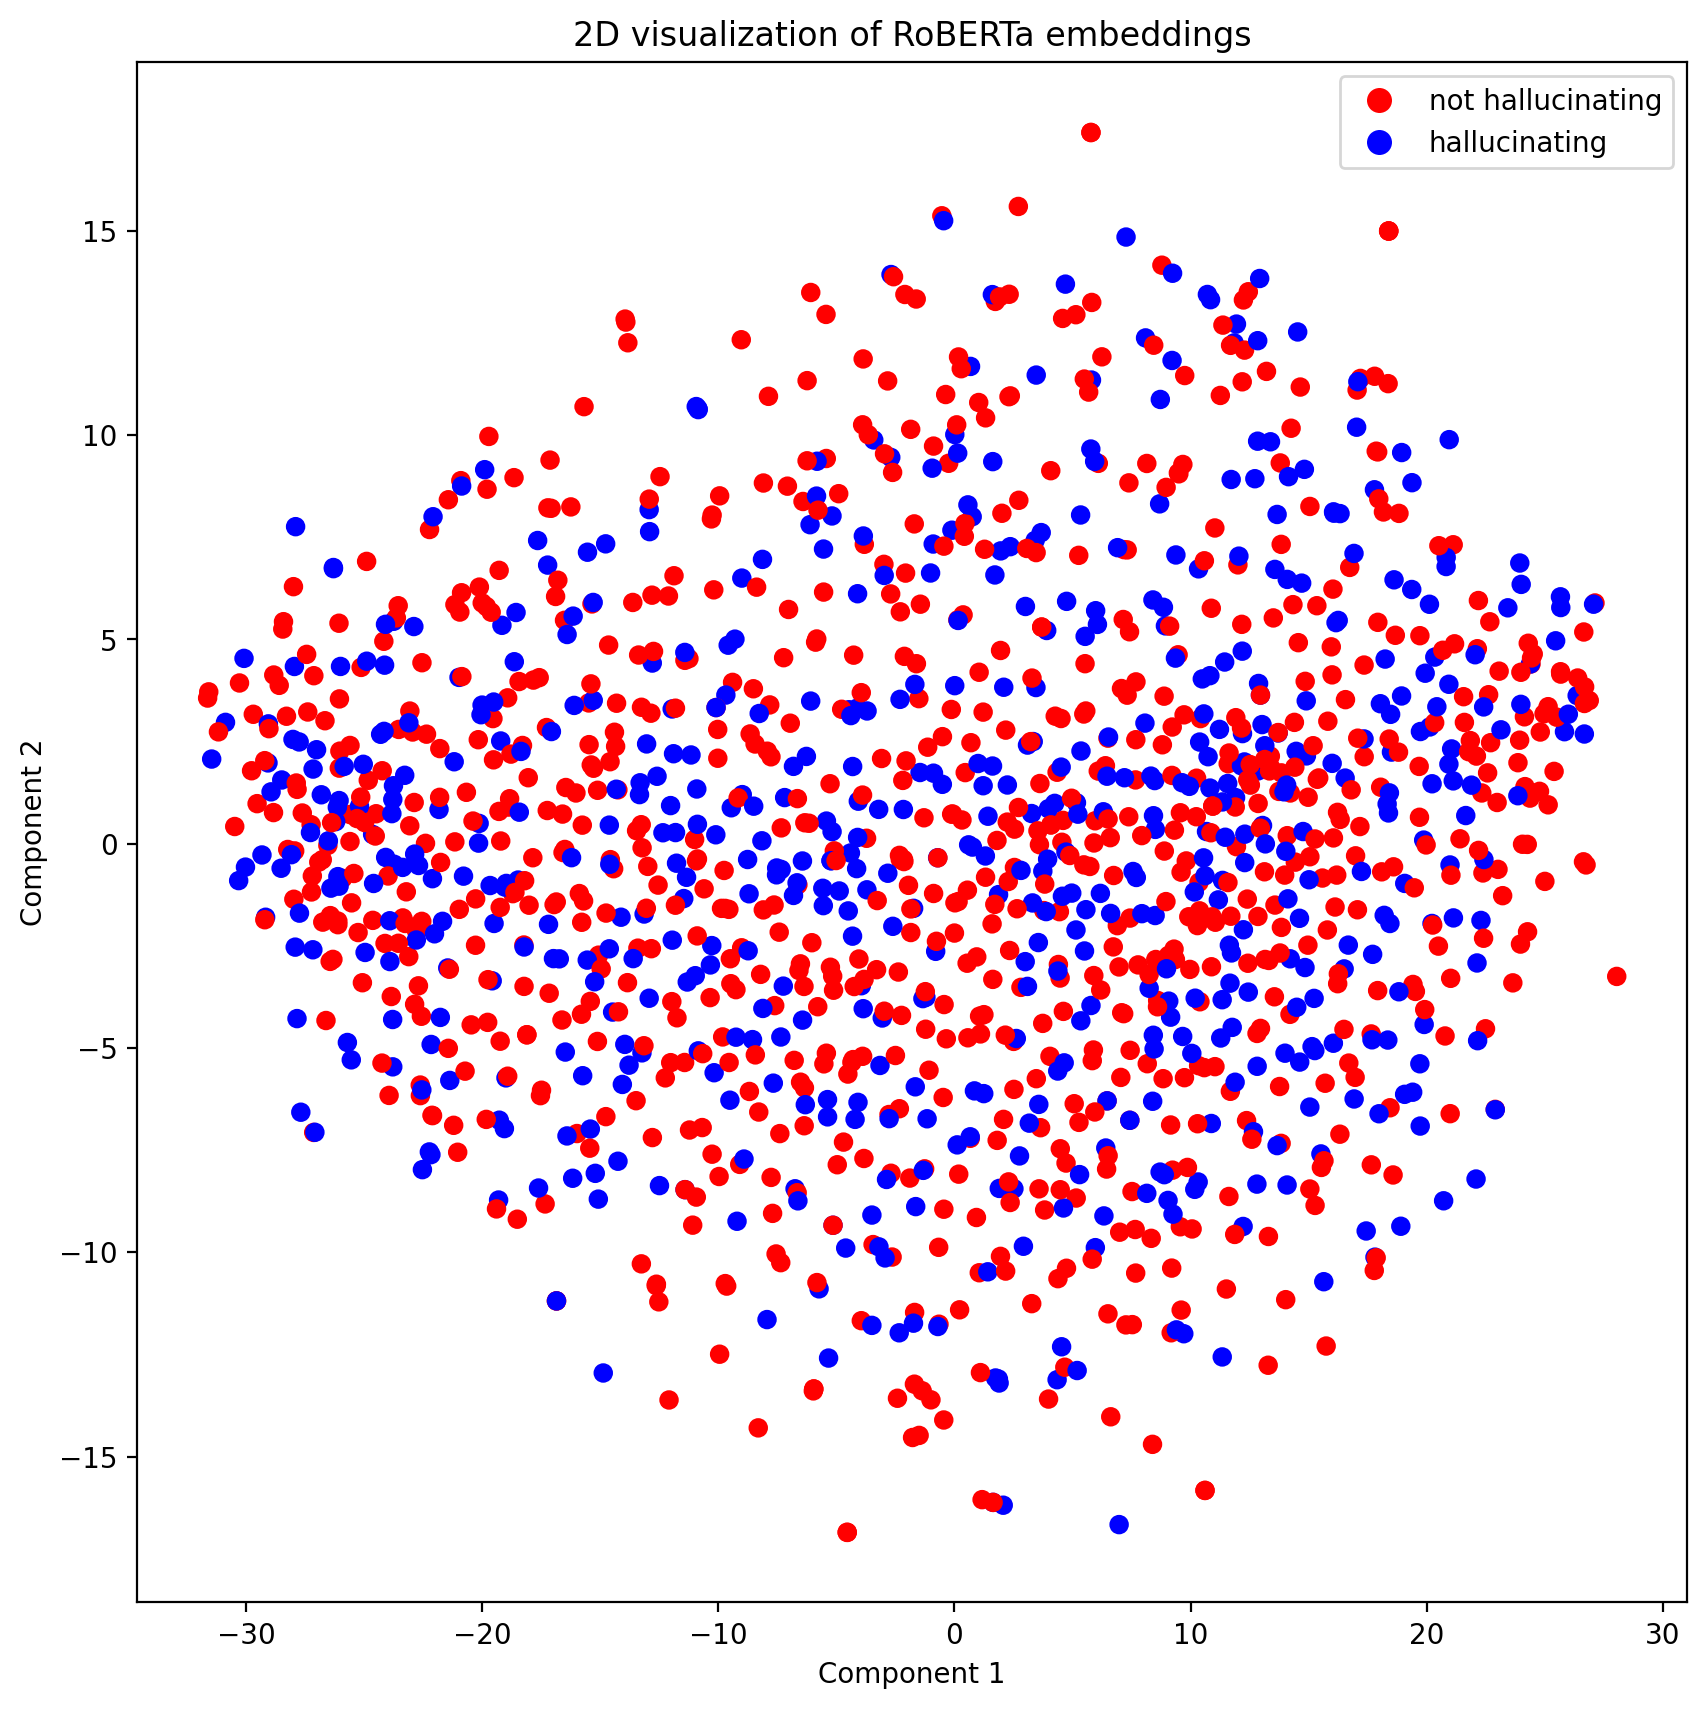

In [ ]:
# Dimensionality reduction with t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=50)
embeddings_2d = tsne.fit_transform(aggregated_embeddings)
labels = final_ag_df['label'].tolist()
# Visualization
colors = ['red' if label == 0 else 'blue' for label in labels]
plt.figure(figsize=(10, 10))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=colors)
plt.title('2D visualization of RoBERTa embeddings')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
# Add legend
handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='not hallucinating'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='hallucinating')
]
plt.legend(handles=handles, loc='upper right')
plt.show()


In [ ]:
# initial embeddings, fine-tuned embeddings?
# ideas to utilize visualized embeddings...hmm
new_roberta_model = TFRobertaForSequenceClassification.from_pretrained(checkpoint, num_labels=2)

# Function to extract embeddings
def extract_embeddings(inputs):
    input_ids = tf.convert_to_tensor(inputs['input_ids'], dtype=tf.int32)
    attention_mask = tf.convert_to_tensor(inputs['attention_mask'], dtype=tf.int32)
    outputs = new_roberta_model(input_ids, attention_mask=attention_mask, output_hidden_states=True)
    hidden_states = outputs.hidden_states[-1]
    return hidden_states[:, 0, :].numpy()

# Tokenize sample text
sample_text = {"hyp": ["Sample hypothesis text"] * 100, "tgt": ["Sample target text"] * 100}
tokenized_inputs = tokenizer(sample_text['hyp'], sample_text['tgt'], truncation=True, padding='max_length', max_length=256, return_tensors='tf')

# Extract initial embeddings
initial_embeddings = extract_embeddings(tokenized_inputs)

# Fine-tune the model (you would typically use your training loop here)
# Assuming fine_tuned_roberta_model is the fine-tuned model
fine_tuned_roberta_model = roberta_model  # Placeholder, replace with your fine-tuned model

# Extract fine-tuned embeddings
fine_tuned_embeddings = extract_embeddings(tokenized_inputs)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
initial_embeddings_2d = tsne.fit_transform(initial_embeddings)
fine_tuned_embeddings_2d = tsne.fit_transform(fine_tuned_embeddings)

# Visualization
plt.figure(figsize=(14, 7))

# Initial embeddings
plt.subplot(1, 2, 1)
plt.scatter(initial_embeddings_2d[:, 0], initial_embeddings_2d[:, 1], c='blue', label='Initial')
plt.title('Initial Embeddings')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()

# Fine-tuned embeddings
plt.subplot(1, 2, 2)
plt.scatter(fine_tuned_embeddings_2d[:, 0], fine_tuned_embeddings_2d[:, 1], c='red', label='Fine-tuned')
plt.title('Fine-tuned Embeddings')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()

plt.show()


In [ ]:
import pandas as pd
from transformers import AutoTokenizer, TFRobertaForSequenceClassification
import tensorflow as tf
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
import numpy as np

# Sample data (replace with your actual data)
data = pd.DataFrame({
    'hyp': ['sample text 1', 'sample text 2', 'sample text 3'],
    'label': [0, 1, 0]
})

X = data['hyp']
y = data['label']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load tokenizer and model
checkpoint = 'FacebookAI/roberta-base'
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = TFRobertaForSequenceClassification.from_pretrained(checkpoint, num_labels=1)

def get_embeddings(texts):
    inputs = tokenizer(texts, return_tensors='tf', padding=True, truncation=True, max_length=512)
    outputs = model(**inputs)
    return outputs.last_hidden_state[:, 0, :].numpy()  # Using the [CLS] token's embeddings

# Get embeddings for train and test sets
X_train_embeddings = get_embeddings(X_train.tolist())
X_test_embeddings = get_embeddings(X_test.tolist())

# Initialize and train the XGBoost model
xgb = XGBClassifier()
xgb.fit(X_train_embeddings, y_train)

# Predictions and evaluation
y_pred = xgb.predict(X_test_embeddings)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Hyperparameter Tuning with Grid Search
param_grid = {
    'max_depth': [3, 4, 5],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_embeddings, y_train)

best_xgb = grid_search.best_estimator_
y_pred_best = best_xgb.predict(X_test_embeddings)
print("Best Accuracy:", accuracy_score(y_test, y_pred_best))
print("Best Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("Best Classification Report:\n", classification_report(y_test, y_pred_best))
